In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
type(data)

sklearn.utils._bunch.Bunch

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target.shape

(569,)

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
# Lets split the data
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(data.data , data.target , test_size=0.33 , random_state=42)

In [9]:
x_train.shape , x_test.shape , y_test.shape ,y_train.shape

((381, 30), (188, 30), (188,), (381,))

In [10]:
#Lets do some scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [11]:
# Build model
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(30,)  ,activation="sigmoid"))

In [12]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [13]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 0.7446 - accuracy: 0.5171 - val_loss: 0.6934 - val_accuracy: 0.5745
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.6010 - val_loss: 0.6223 - val_accuracy: 0.6543
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6047 - accuracy: 0.6719 - val_loss: 0.5610 - val_accuracy: 0.7234
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.5487 - accuracy: 0.7192 - val_loss: 0.5094 - val_accuracy: 0.7606
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.7690 - val_loss: 0.4660 - val_accuracy: 0.8032
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4626 - accuracy: 0.8005 - val_loss: 0.4283 - val_accuracy: 0.8511
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.8373 - val_loss: 0.3967 - val_accuracy: 0.8670
Epoch 8/100


Epoch 59/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9790 - val_loss: 0.1031 - val_accuracy: 0.9787
Epoch 60/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9790 - val_loss: 0.1021 - val_accuracy: 0.9787
Epoch 61/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9790 - val_loss: 0.1011 - val_accuracy: 0.9787
Epoch 62/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1209 - accuracy: 0.9790 - val_loss: 0.1001 - val_accuracy: 0.9787
Epoch 63/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1199 - accuracy: 0.9790 - val_loss: 0.0992 - val_accuracy: 0.9787
Epoch 64/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9790 - val_loss: 0.0983 - val_accuracy: 0.9787
Epoch 65/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1181 - accuracy: 0.9790 - val_loss: 0.0974 - val_accuracy: 0.9787
Epoch 

In [14]:
print("Train score : " , model.evaluate(x_train,y_train))
print("Test score : " , model.evaluate(x_test,y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 0.9816
Train score :  [0.09644116461277008, 0.9816272854804993]
6/6 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9787
Test score :  [0.07646501064300537, 0.978723406791687]


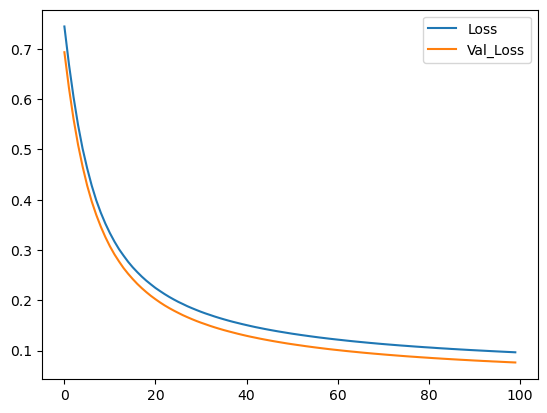

In [15]:
#plot what return by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history["loss"] , label="Loss")
plt.plot(r.history["val_loss"] , label="Val_Loss")
plt.legend()

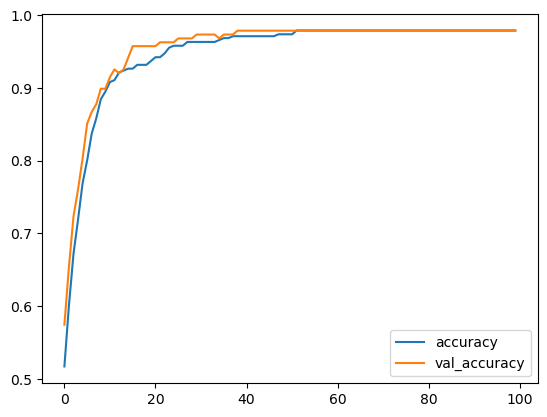

In [16]:
#plot the accuracy too
plt.plot(r.history["accuracy"] , label="accuracy")
plt.plot(r.history["val_accuracy"] , label="val_accuracy")
plt.legend()